# Laboratorio 2 - Parte 1

### Modelos no paramétricos

### 2019-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer integrante
Nombre: Kevin Martínez Gallego
#### Segundo integrante
Nombre: Andrés Mauricio Álvarez Ortiz

In [2]:
from __future__ import division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as matlib

from numpy import random
import math

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1: Generar muestras

Genere un conjunto de 1000 muestras artificiales con una distribución que corresponda a la suma de dos Gaussiana con diferente media, ambas de una sola dimension. Grafique el histograma de los datos generados. (`plt.hist()`)

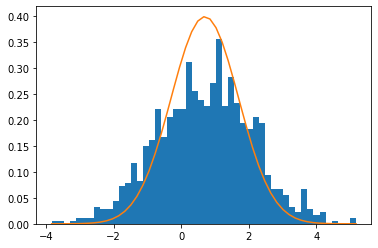

In [3]:
mu_1 = 0.3
mu_2 = 0.4 
sigma = 1
gaussiana_1 = np.random.normal(mu_1, sigma, 1000)
gaussiana_2 = np.random.normal(mu_2, sigma, 1000)
suma = gaussiana_1 + gaussiana_2

count, bins, _ = plt.hist(suma, 50, density = True)
plt.plot(bins, 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(bins - (mu_1 + mu_2))**2 / (2 * sigma**2)))
plt.show()

## Ejercicio 2: Contextualización del problema

Para el problema de regresion usaremos la misma base de datos del laboratorio anterior `AirQuality.data`. Esta es la base de datos del UCI Machine Learning Repository. En el siguiente URL se encuentra toda la descripción de la base de datos del problema http://archive.ics.uci.edu/ml/datasets/air+quality. Ejecute la siguiente celda para cargar los datos.

In [3]:
#Cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter


#X: Toma las primeras 5000 filas(muestras) y las columnas 0-11 (características)
X = db[:5000,0:12]

#Y: Toma las primeras 5000 filas y la columna 12, corresponde a la salida de la regresión
Y = db[:5000,12]

In [6]:
print(X.shape)
print(Y.shape)

(5000, 12)
(5000,)


Describa cómo esta construida la base de datos utilizada en el problema de regresión: 

2.1 ¿Cuántas muestras hay en total?:

La base de datos contiene en total 9358 muestras; sin embargo, en este caso se están considerando las primeras 5000 muestras.

2.2 ¿Cuántas características tiene el problema?:

Originalmente, la base de datos cuenta con 15 atributos incluyendo la variable de salida. No obstante, en este caso se están considerando 12 características.

## Ejercicio 3: Completar código de K-Vecinos

Analice los siguientes métodos de la teoría vista para los modelos de *K-vecinos más cercanos (KNN)* y complete el código del método KNN.

<b>Nota</b>: Para el cáculo de la distancia entre vectores tienen dos opciones, usar la función la distancia euclidiana `scipy.spatial.distance.euclidean`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)) o usar la función `numpy.linalg.norm`([Ejemplo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)). Revisen la documentación para comprender su uso. También serán de utilidad las funciones `numpy.sort` y `numpy.argsort`.


In [5]:
import scipy as sc
from scipy.spatial import distance
from scipy import stats
import operator


def KNN(X_train, Y_train, X_test, k, tipo):
    
    #X_train: Matriz con las muestras de entrenamiento
    #Y_train: Vector con los valores de salida para cada una de las muestras de entrenamiento
    
    #X_val: Matriz con las muestras de validación
    #tipo: Bandera que indica si el problema es de regresión o de clasificación.
    tipo = tipo
    
    #Parámetro k que equivale al número de vecinos a tener en cuenta para resolver el problema de 
    #predicción de la variable de salida
    k = k 
    Ntest = len(X_test)
    Y_test = np.zeros(Ntest)
    Y_train_kVecinos = np.zeros(k)

    Ntrain = len(X_train)
    distancias = np.zeros(Ntrain)
    for i in range(Ntest):
        muestra = X_test[i,:]
        for j in range(Ntrain):
            distancias[j] = distance.euclidean(muestra, X_train[j])
        distanciasSortIndex = np.argsort(distancias)
        for j in range(k):
            Y_train_kVecinos[j] = Y_train[distanciasSortIndex[j]]
        if(tipo == 0): # clasificación
            Y_test[i] = stats.mode(Y_train_kVecinos)
        elif(tipo == 1): # regresión
            Y_test[i] = np.mean(Y_train_kVecinos)
        
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_test, en el mismo orden.  
    return Y_test 

## Ejercicio 4: Entrenamiento y pruebas

Una vez haya completado el codigo del método de KNN:
1. Ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro  $k$ que corresponde al número de vecinos
2. Completar la tabla de resultados con el error MAPE y la desviación estándar.

In [6]:
"""
Mean Absolute Percentage Error para los problemas de regresión
"""
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 


"""
Calcular el error en clasificación
"""
def error(Y_lest, Y):
    
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    return error

In [7]:
def executeKNN(k, tipo):
    N = np.size(X,0)

    #Entrenamiento y validación del modelo
    random.seed(1)
    Error = np.zeros(2)

    for j in range(2):

        ind=np.random.permutation(N)
        Xtrain = X[ind[0:int(math.ceil(0.7*N))],:]
        Xtest = X[ind[int(math.ceil(0.7*N)):N],:]
        Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
        Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Complete con el llamado apropiado de la función que Uds diseñaron 
        #(X_train, Y_train, X_val, k, tipo)
        tipo = tipo
        #k = 2
        Yest = KNN(Xtrain, Ytrain, Xtest, k, tipo)

        #Evaluamos las predicciones del modelo con los datos de test
        Error[j] = MAPE(Yest,Ytest)

    mape = np.mean(Error)
    std = np.std(Error)

    print('\nError durante la prueba k=' + str(k) + ' ' +  str(mape) + '+-' + str(std))

    return(mape, std)

Responda:

4.1 ¿Qué metodología de validación se usa en el experimento?

En este caso se está utilizan el método de validación MAPE (Mean Absolute Percentage Error). Con esta medida de error obtenemos en que porcentaje se desvió la salida obtenida de la esperada, respecto de las variables en cuestión.

In [11]:
N = np.size(X,0)
ind=np.random.permutation(N)
print((X[ind[0:int(math.ceil(0.7*N))],:]).shape)
print((X[ind[int(math.ceil(0.7*N)):N],:]).shape)

(3500, 12)
(1500, 12)


4.2 ¿Cuántas muestras se usan para el entrenamiento?

Para entrenamiento se utilizan 3500 muestras, las cuales equivalen al 70% del total de muestras (5000).

4.3 ¿Cuántas muestras se usan para la validación?

Para validación se utilizan 1500 muestras, las cuales equivalen al 30% restante del total de muestras (5000).

#### Tabla de resultados

In [8]:
import numpy as np
import pandas as pd
#!pip install qgrid
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de vecinos' : pd.Series(['1', '2', '3', '4', '5', '6', '7', '100'])})
df_types["Error_Prueba"] = ""
df_types["Desviación estándar del error"] = ""
df_types.set_index(['Numero de vecinos'], inplace=True)
#df_types["Error_Prueba"][1] = "0.3630"
#df_types["Desviación estándar del error"][1] = "0.0061"

tipo = 1 # regresión
valoresK = np.array([1,2,3,4,5,6,7,100])
for i in range(np.size(valoresK)):
    error, std = executeKNN(valoresK[i], tipo)
    df_types["Error_Prueba"][i] = error
    df_types["Desviación estándar del error"][i] = std

#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

C:\Users\Kevin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Kevin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Kevin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Kevin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Kevin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19


Error durante la prueba k=1 0.3840372997747079+-0.016497301273993348

Error durante la prueba k=2 0.3630095013508765+-0.006140024361192514

Error durante la prueba k=3 0.3497424913566185+-0.0023601226154101596

Error durante la prueba k=4 0.34117124804036614+-0.004561202028195682

Error durante la prueba k=5 0.33365100995901664+-0.0027102869335308977

Error durante la prueba k=6 0.3252859355963996+-0.001992847379454543

Error durante la prueba k=7 0.3201103542753637+-0.0007978802015047026

Error durante la prueba k=100 0.26879661924012493+-0.005340544195603092


C:\Users\Kevin\Anaconda3\lib\site-packages\qgrid\grid.py:827: DeprecationWarning: QgridWidget._df_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _df_changed(self):


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [9]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Numero de vecinos,,
1,0.384037,0.0164973
2,0.36301,0.00614002
3,0.349742,0.00236012
4,0.341171,0.0045612
5,0.333651,0.00271029
6,0.325286,0.00199285
7,0.32011,0.00079788
100,0.268797,0.00534054


## Ejercicio 5: Ventana de Parzen

Resolver el mismo problema de regresión, pero con el modelo de *Ventana de Parzen*. Se debe completar el código de la función <font color='blue'>Nadaraya-Watson</font>  Recuerde la función de densidad de probabilidad con la ventana de Parzen.
$$f({\bf{x}}^*) = \frac{1}{N h^d} \sum_{i=1}^{N} K(u_i), \;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$$


Nota: Los métodos `dist_euclidiana` y ECM continuan siendo válidos para el modelo ventana de Parzen.


In [35]:
def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def Nadaraya_Watson(X_train, Y_train, X_val, ancho_h):
    
    h = ancho_h    #Parámetro h que equivale al ancho de la ventana o kernel
    Nval = len(X_val)
    Ntrain = len(X_train)
    Y_val = np.zeros(Nval)
    
    for i in range(Nval):
        muestra = X_val[i,:]
        numerador = 0
        denominador = 0
        for j in range(Ntrain):
            distancia = distance.euclidean(muestra, X_train[j])/h
            peso = kernel_gaussiano(distancia)
            numerador += peso * Y_train[j]
            denominador += peso
        Y_val[i] = numerador/denominador
        
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.      
    return Y_val


In [51]:
def executePARZEN_NW(ancho_h):
    N = np.size(X,0)

    #Entrenamiento y validación del modelo
    random.seed(1)
    Error = np.zeros(2)

    for j in range(2):

        ind=np.random.permutation(N)
        Xtrain = X[ind[0:int(math.ceil(0.7*N))],:]
        Xtest = X[ind[int(math.ceil(0.7*N)):N],:]
        Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
        Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Complete con el llamado apropiado de la función que Uds diseñaron 
        #(X_train, Y_train, X_val, k, tipo)
        #tipo = 0
        #ancho_h = 0.9
        Yest = Nadaraya_Watson(Xtrain, Ytrain, Xtest, ancho_h)

        #Evaluamos las predicciones del modelo con los datos de test
        Error[j] = MAPE(Yest,Ytest)

    mape = np.mean(Error)
    std = np.std(Error)

    print('\nError durante la prueba ' +  str(mape) + '+-' + str(std))

    return(mape, std)

## Ejercicio 6: Entrenamiento y pruebas

Una vez haya completado el codigo del método de Ventana de Parzen, ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro $h$, que corresponde al ancho de la función kernel. Completar la siguiente tabla con los valores del error MAPE obtenidos y su desviación estándar:

#### Tabla de resultados

In [52]:
randn = np.random.randn
df_types2 = pd.DataFrame({
    'Ancho del kernel' : pd.Series(['0.1', '0.9', '1', '2', '3', '5', '10'])})
df_types2["Error_Prueba"] = ""
df_types2["Desviación estándar del error"] = ""
df_types2.set_index(['Ancho del kernel'], inplace=True)
#df_types2["Error_Prueba"][1] = "0.3011"
#df_types2["Desviación estándar del error"][1] = "0.0031"

valoresH = np.array([0.1,0.9,1,2,3,5,10])
for i in range(np.size(valoresH)):
    error, std = executePARZEN_NW(valoresH[i])
    df_types2["Error_Prueba"][i] = error
    df_types2["Desviación estándar del error"][i] = std

#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types2, show_toolbar=False)
qgrid_widget


Error durante la prueba 0.38130057348448304+-0.015731139983383324

Error durante la prueba 0.30111035388439256+-0.0031344056092405814

Error durante la prueba 0.3052229403956968+-0.0031592182248232903

Error durante la prueba 0.305480581722527+-0.003943068384557297

Error durante la prueba 0.299316519656669+-0.004245154346174562

Error durante la prueba 0.2644374071451173+-0.0033811170453101613

Error durante la prueba 2.1427564244929034+-0.15597858444551282


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [53]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Ancho del kernel,,
0.1,0.381301,0.0157311
0.9,0.30111,0.00313441
1,0.305223,0.00315922
2,0.305481,0.00394307
3,0.299317,0.00424515
5,0.264437,0.00338112
10,2.14276,0.155979


Responda:

6.1 Si intenta repetir la prueba anterior para un $h = 0.05$ el algoritmo falla. ¿Cuál es la causa de la falla?:

6.2 ¿Cómo evito que se presente la excepción?: